# Normal Distribution

The **normal distribution**, also called the Gaussian distribution, is the most recognized probability distribution in all of math for good reason. It creates that familiar bell-shaped curve defined by a mean and standard deviation, where the mean indicates where most values occur and the standard deviation describes how spread out the values are. It is seen across nature, engineering, and other sciences and even shows up in non-normal datasets due to the central limit theorem. 

Let's bring in Pandas and get started. Let's also bring in matplotlib to do some visualizations. Finally, let's bring in the lightbulb dataset as a Series using `squeeze()`. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np 

X = pd.read_csv("https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/distribution/lightbulb_data.csv") \
    .squeeze()
X

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


0      701
1      697
2      617
3      708
4      676
      ... 
145    726
146    651
147    618
148    677
149    603
Name: lightbulb_life_hours, Length: 150, dtype: int64

## Probability Density Function

The normal distribution is a symmetrical bell-shaped distribution that has most mass around the mean, and its spread is defined through the standard deviation. The “tails” on either side become thinner as you move further away from the mean.

Let's plot the lightbulb life datapoints on a numberline. There is no number line in matplotlib, so we will hack a scatterplot by making all the y-values "0". Let's also get the mean and standard deviation of the data. 

MEAN: 672.2, STD: 51.48062775022316


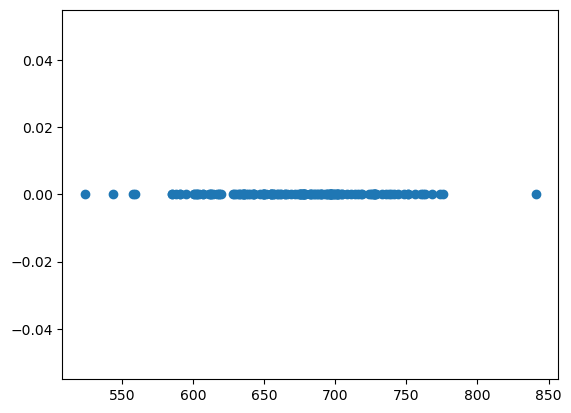

In [2]:
mean = X.mean()
std = X.std()

print(f"MEAN: {mean}, STD: {std}")

plt.plot(X, [0 for _ in X], 'o') # use a scatterplot to make numberline 

We can see clearly that there are more points around the center near the mean of 672.2, but as we get further away from the mean in either direction we see less and less datapoints. We can capture this density of points along the x-axis by projecting that density to the y-axis. We call this the **probability density function** of the normal distribution. If the data is normally distributed, the place where most points are clustered should be around the mean. The standard deviation will capture the spread. Those happen to be the arguments for Scipy's `norm.pdf()` function. 

Let's take a look. 

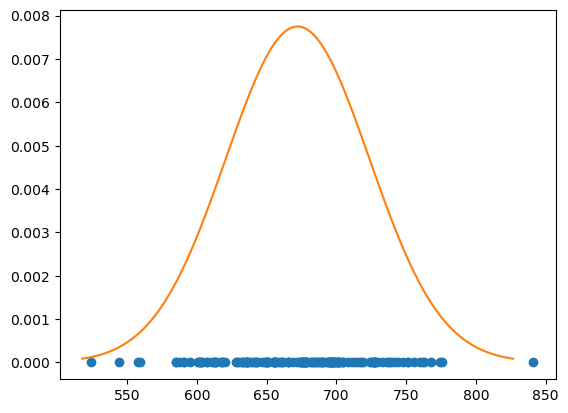

In [3]:
# have axis range capture ± 3 standard deviations around mean 
x_range = np.arange(mean-std*3, mean+std*3, .01) 

# plot scatterplot and the normal PDF 
plt.plot(X, [0 for _ in X], 'o') # scatterplot
plt.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 
plt.show()

This bell curve helps us visualize how likely we are to see a given lightbulb lifespan. For example, we see it is reasonably likely to see a lightbulb have a life between 600 and 750 hours. It is most likely to be around 672.2 hours which is the mean, and the highest point of the bell curve.  It is extremly unlikely to see a bulb with a lifespan of around 850 hours or 500 hours, because those values are on the tails. 


## Cumulative Density Function 

This brings up an important point in how to interpret the normal distribution. The area under the entire curve is 1.0, which means it models probablity (hence the name *probability* density function). Since there is an infinite number of points on the bell curve (because it is a continuous function and decimals can have infinite numbers of digits), it is unreasonable to ask the probablity of a specific value, like "what is the probability a lightbulb will last exactly 675 hours?" Paradoxically, that probability is 0 because there are an infinite number of values on the curve. 

Instead, we model probablity questions with *ranges* of values, like "what is the probability a light bulb will last between 650 and 700 hours?" This question we can answer by calculating the area under the bell curve for that range, as shaded below. 

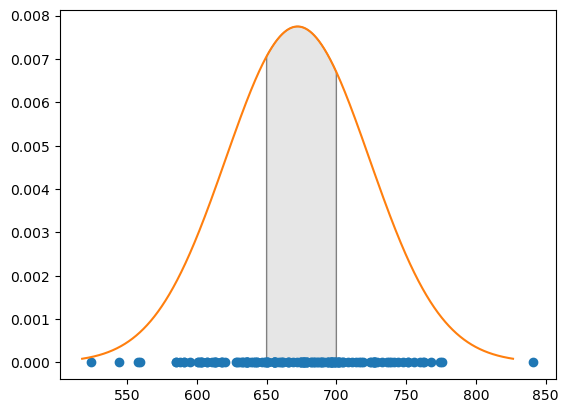

In [4]:
from matplotlib.patches import Polygon


fig, ax = plt.subplots()
ax.plot(X, [0 for _ in X], 'o') # scatterplot
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

a,b = 650, 700
ix = np.linspace(a, b)
iy =  norm.pdf(ix, mean, std)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.show()

So how do we calculate the shaded area? We will need another tool called the **cumulative density function**, which measures the area up to a given x-value on the probability density function. Let's visualize this step-by-step. 

We want to find the life between 650 and 700 hours. First, let's visualize the area up to 700 hours as shaded below. 

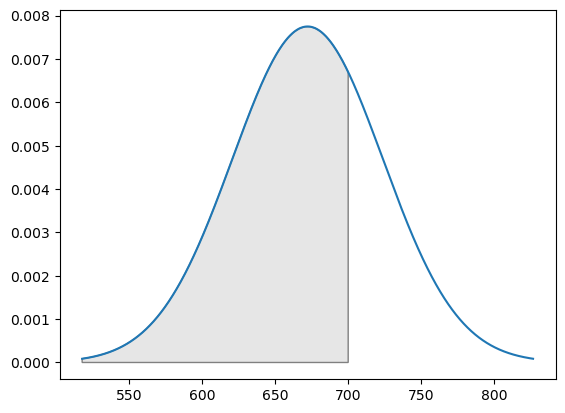

In [5]:
fig, ax = plt.subplots()
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

# shaded area 
a,b = x_range.min(), 700
ix = np.linspace(a, b)
iy =  norm.pdf(ix, mean, std)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

# show plot 
plt.show()

We can calculate this area/probability using the normal CDF function in SciPy, which you will find to be about $ .7054 $. 

In [6]:
norm.cdf(700, mean, std)

0.7054045716612753

Next we need to calculate the area up to 650, as shaded below. 

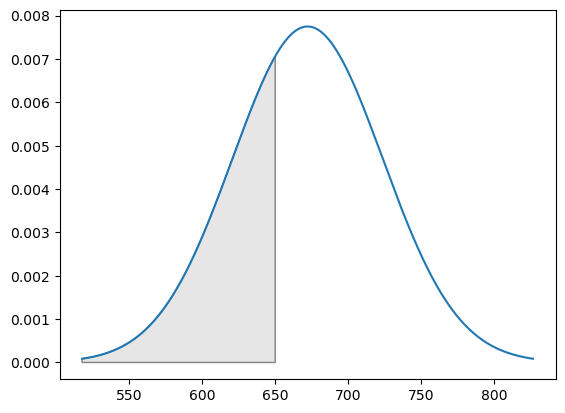

In [7]:
fig, ax = plt.subplots()
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

# shaded area 
a,b = x_range.min(), 650
ix = np.linspace(a, b)
iy =  norm.pdf(ix, mean, std)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

# show plot 
plt.show()

Again, use the CDF function to calculate this area which will be about $ .3331 $. 

In [8]:
norm.cdf(650, mean, std)

0.333150508452974

But remember, we want to find the area between $700$ and $650$. Logically, we can achieve this by taking the area up to 700, and subtracting the area up to 650, and that will leave us with the area only for that range as visualized below. 

svg image

We can achieve this simply by executing this subtraction operation between both CDF calls, and we are left with the answer. The probability a light bulb will last between 650 and 700 hours is about $ .3723 $ or $ 37.23 \% $.

In [9]:
# probability/area between 650 and 700 
p = norm.cdf(700, mean, std) - norm.cdf(650, mean, std)
p

0.37225406320830134

So what exactly does the relationship between the PDF and CDF look like? Well, let's plot both of them together as shown below. The PDF is blue and the CDF is red. 

Notice that the cumulative density function is an S-shaped curve that captures the area (the right vertical axis) up to that given x-value. At the mean, the PDF is exactly at the top of the bell curve where it symmetrically cuts down the middle. It also is where the CDF captures exactly 0.5, or 50%, of the area under the bell curve. 

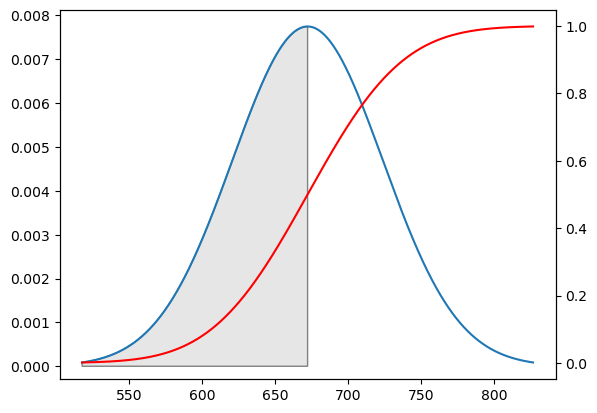

In [10]:
from matplotlib.patches import Polygon

# plot PDF
fig, ax = plt.subplots()
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

# plot CDF 
ax2 = ax.twinx()  
ax2.plot(x_range, norm.cdf(x_range, mean, std),color="red") # cumulative density function 


# shaded area up to mean 
a,b = x_range.min(), mean
ix = np.linspace(a, b)
iy =  norm.pdf(ix, mean, std)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.show()

## Inverse Cumulative Density Function (PPF)

For a normal distribution, we just saw how to look up the area up to a given x-value using the cumulative density function (CDF), such as how to find the area up to an x-value of 650. 

But what if we flipped the question? What if we wanted to find the x-value for a given area? What if I wanted to find the x-value that gave me 90% of the area to its left? 

svg image

This is going to require an inverted lookup on the cumulative density function, where we look up the probability and then return the corresponding x-value. However, the CDF does not support this inverted lookup. What if we were to flip the function somehow? 

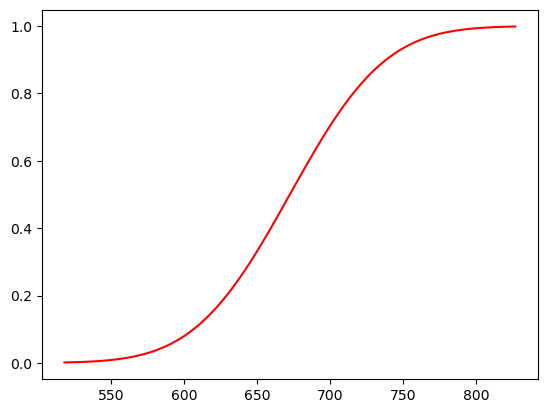

In [11]:
# plot CDF
plt.plot(x_range, norm.cdf(x_range, mean, std),color="red") # cumulative density function 
plt.show()

Well thankfully, we can! We will want to use the **inverse CDF**, also called the **probability point function (PPF)** to perform this. It simply flips the x-axis and y-axis so you can look up a given x-value for a given probability. Note how the s-shape is now inverted when using the `ppf()` function below. 

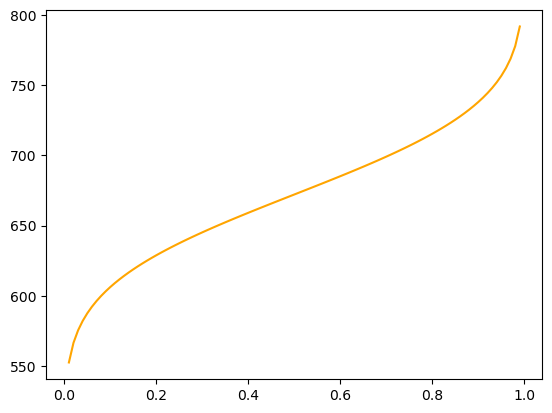

In [12]:
# plot inverse CDF
inv_x_range = np.arange(0,1,.01)
plt.plot(inv_x_range, norm.ppf(inv_x_range, mean, std),color="orange") # cumulative density function 
plt.show()

Now we can answer the question very easily. What x-value will give me 90% of the area to its left? We just use the `ppf()` function to retrieve this and find it is $ 738.175 $. 

In [13]:
norm.ppf(.9, mean, std)

738.1750790885174

We can integrate this straight into a bell curve area plot as shown below. 

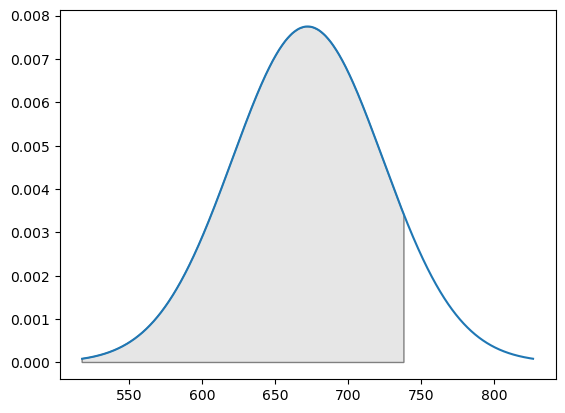

In [14]:
fig, ax = plt.subplots()
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

# shaded area, note the use of PPF to retrieve the end of range x-value
# that yields .90 of the area. 
a,b = x_range.min(), norm.ppf(.9, mean, std)
ix = np.linspace(a, b)
iy =  norm.pdf(ix, mean, std)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

# show plot 
plt.show()

## Standard Normal Distribution and Z-Scores

When we have a normal distribution with a mean of 0 and a standard deviation of 1, we call it the **standard normal distribution**. It is the default distribution that you will turn to for a number of statistical problems. 

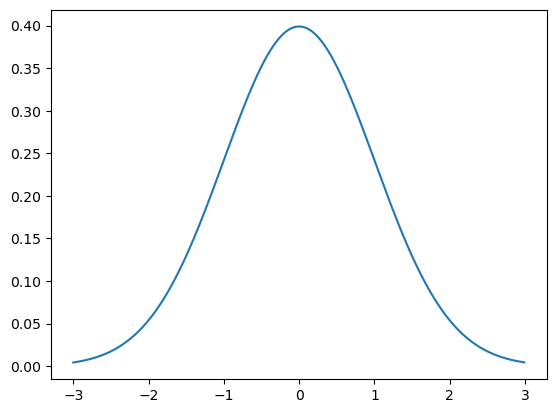

In [16]:
x_range = np.arange(-3,3,.01)
plt.plot(x_range, norm.pdf(x_range,0,1))
plt.show()

When we are presented with normal data such as the lightbulb life dataset, we will sometimes want to express each value in terms of standard deviations so we can easily compare one value with another value between two separate datasets with two different distributions.  This means effectively rescaling the normal distribution into the standard normal distribution. This conversion of x-values into standard deviations is what we call the **z-score** and it is pretty basic to calculate. Just subtract the mean and then divide by the standard deviation.  

$
\Large{z = \frac{x-\mu}{\sigma}}
$

In [17]:
import scipy.stats as stats
(X - mean) / std

0      0.559434
1      0.481735
2     -1.072248
3      0.695407
4      0.073814
         ...   
145    1.045053
146   -0.411805
147   -1.052823
148    0.093239
149   -1.344195
Name: lightbulb_life_hours, Length: 150, dtype: float64

You can also have SciPy do this for you by using the `zscore()` function. Note you will have to provide a `ddof=1` argument if you want the standard deviation to be calculated as a sample rather than a population. 

In [18]:
from scipy.stats import zscore


zscore(X,ddof=1)

0      0.559434
1      0.481735
2     -1.072248
3      0.695407
4      0.073814
         ...   
145    1.045053
146   -0.411805
147   -1.052823
148    0.093239
149   -1.344195
Name: lightbulb_life_hours, Length: 150, dtype: float64

Here is an example of where the z-score could be helpful. Let's say we have a competitor's lightbulb that lasts for a mean of 1000 hours and standard deviation of 200 hours. Ours has a mean of 672.2 and a standard deviation of 51.48. Does that make their bulb superior just because they have a higher mean? Well, not necessarily. We need to account for the spread of the competitor's light bulb possibly being wider. 

We tested one of our competitor's bulbs and it lasted for 785 hours. One of ours lasted for 655 hours. Which one performed more poorly compared to their typical advertised life spans? 

We can calculate this easily by calculating each outcome as a z-score. 

In [19]:
print(f"COMPETITOR: {(785-1000)/200},  OURS: {(655-mean)/std}")

COMPETITOR: -1.075,  OURS: -0.334106259998461


So our lightbulb was much closer to the mean and expected lifespan than our competitors, because we got a z-score of -.334 standard deviations from the mean. Our competitor got a z-score of -1.075 standard deviations from the mean. 

To compare the spread between two distributions entirely, and ask which one has more spread, you can use the **coefficient of variation**. It is simply the standard deviation divided by the mean. 

$
\Large{\text{cv} = \frac{\sigma}{\mu}}
$

In [20]:
print(f"COMPETITOR CV: {200/1000},  OUR CV: {std/mean}")

COMPETITOR CV: 0.2,  OUR CV: 0.07658528377004337


Because the competitor's bulb has a higher coefficient of variation, they have more spread in their bulb lifespan.

We can also use the `variation()` function in SciPy to calculate this. 

In [21]:
from scipy.stats import variation

variation(X)

0.0763295725928281

## Exercise

With normal usage, a Grannysmith Air laptop has 20 hours of battery life with a 1 hour standard deviation. What is the probability it will last between 18 and 22 hours? Complete the code below by replacing the question mark "?"

In [ ]:
from scipy.stats import norm

mean = 20
std = 1

# probability between 18 and 22 hours
p = ?
p

### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

### ANSWER:

In [30]:
from scipy.stats import norm

mean = 20
std = 1

# probability between 18 and 22 hours
p = norm.cdf(22, mean, std) - norm.cdf(18, mean, std)
p

0.9544997361036416